   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


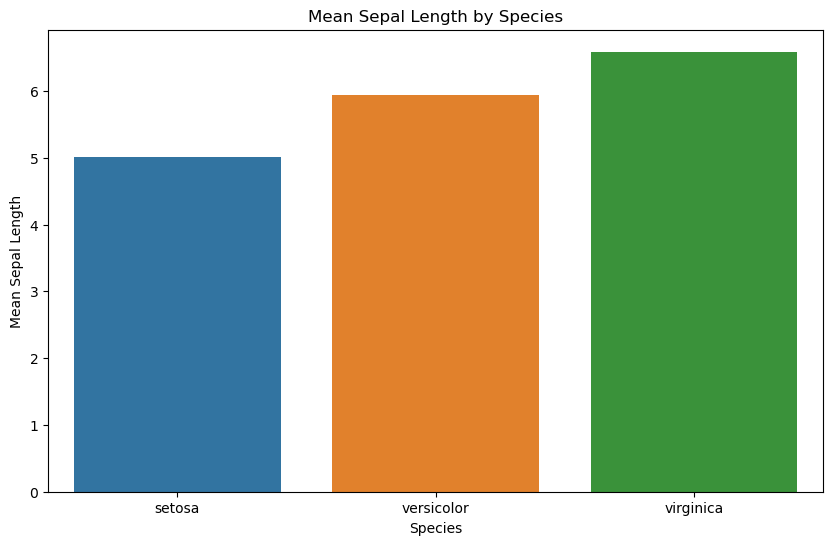

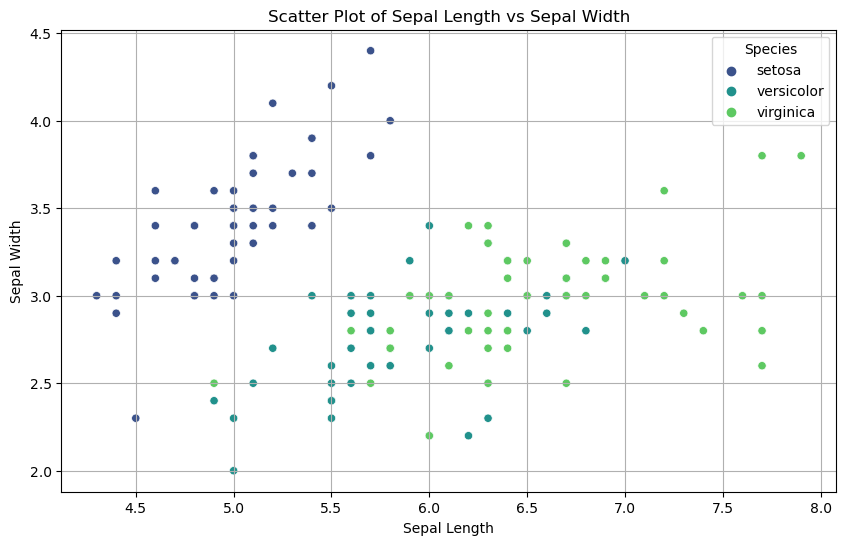

In [1]:
!pip install seaborn

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris_df.head())

# Transformation: Group by species and calculate mean of sepal_length
species_sepal_length_mean = iris_df.groupby('species')['sepal_length'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=species_sepal_length_mean, x='species', y='sepal_length')
plt.title('Mean Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species', palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.grid(True)
plt.show()

10089009300.890953


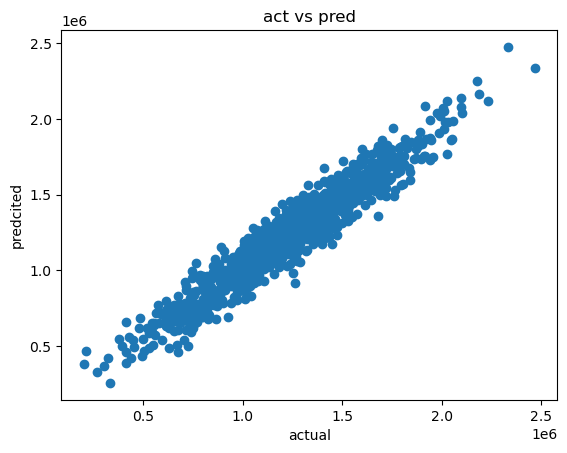

In [2]:

# # Download CSV from -> https://rb.gy/rogm9q

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('USA_Housing.csv')
df

df.dtypes

x = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predcited')
plt.title('act vs pred')
plt.show()


In [ ]:

!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()






Epoch 1/5




938/938 [==============================] - 38s 39ms/step - loss: 0.1876 - accuracy: 0.9446 - val_loss: 0.0624 - val_accuracy: 0.9792
Epoch 2/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0394 - val_accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 4/5
697/938 [=====================>........] - ETA: 11s - loss: 0.0285 - accuracy: 0.9907